<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>KECERDASAN BUATAN
<center><br><font size="5"><font face="calibri"><strong>PULSAR CANDIDATES COLLECTED DURING THE HIGHT TIME RESOLUTION UNIVERSE SURVEY
<br><br>
<br><strong>Oleh :
<br>
<br><strong>MUHAMMAD ZIYAN PRATAMA
<br><strong>09011281722045
<br><br>
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

# MEMPREDIKSI BINTANG PULSAR

HTRU2 adalah kumpulan data yang menggambarkan sampel kandidat pulsar yang dikumpulkan selama Survei Universe Resolusi Tinggi Waktu.

Pulsar adalah jenis bintang Neutron yang langka yang menghasilkan emisi radio yang dapat dideteksi di Bumi. Mereka sangat menarik secara ilmiah sebagai wahana ruang-waktu, medium antar-bintang, dan keadaan materi.

Saat pulsar berputar, pancaran emisinya menyapu langit, dan ketika hal ini melintasi garis pandang kita, menghasilkan pola yang dapat dideteksi dari emisi radio broadband. Saat pulsar berputar dengan cepat, pola ini berulang secara berkala. Jadi pencarian pulsar melibatkan mencari sinyal radio periodik dengan teleskop radio besar.

Setiap pulsar menghasilkan pola emisi yang sedikit berbeda, yang sedikit berbeda pada setiap putaran. Dengan demikian deteksi sinyal potensial yang dikenal sebagai 'kandidat', dirata-ratakan pada banyak rotasi pulsar, sebagaimana ditentukan oleh panjang pengamatan. Dengan tidak adanya info tambahan, masing-masing kandidat berpotensi menggambarkan pulsar yang sebenarnya. Namun dalam praktiknya hampir semua deteksi disebabkan oleh interferensi frekuensi radio (RFI) dan kebisingan, membuat sinyal yang sah sulit ditemukan.

Alat pembelajaran mesin sekarang digunakan untuk secara otomatis melabeli kandidat pulsar untuk memfasilitasi analisis yang cepat. Sistem klasifikasi khususnya sedang banyak diadopsi, yang memperlakukan set data kandidat sebagai masalah klasifikasi biner. Di sini contoh pulsar yang sah adalah kelas positif minoritas, dan contoh palsu adalah kelas negatif mayoritas.

Kumpulan data yang dibagikan di sini berisi 16.259 contoh palsu yang disebabkan oleh RFI / noise, dan 1.639 contoh pulsar nyata. Semua contoh ini telah diperiksa oleh annotator manusia.

Setiap baris mencantumkan variabel terlebih dahulu, dan label kelas adalah entri terakhir. Label kelas yang digunakan adalah 0 (negatif) dan 1 (positif).

# Import Library

In [100]:
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score,accuracy_score
from sklearn.model_selection import train_test_split

Berikut ini adalah paket-paket yang digunakan antara lain :

Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.

Paket sklearn.utils

Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler.

NumPy adalah paket dasar untuk komputasi ilmiah dengan Python. NumPy juga dapat digunakan sebagai wadah data generik multidimensi yang efisien. Hal ini memungkinkan NumPy untuk terintegrasi dengan mudah dan cepat dengan berbagai macam database.

Pandas merupakan toolkit yang powerfull sebagai alat analisis data dan struktur untuk bahasa pemrograman Python. 

Seaborn adalah library untuk membuat grafik statistik dengan Python. Ini dibangun di atas matplotlib dan terintegrasi dengan struktur data pandas.

Matplotlib.pyplot berungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain.

## ATRRIBUTE INFORMATION

Setiap kandidat dijelaskan oleh 8 variabel kontinu, dan variabel kelas tunggal. Empat yang pertama adalah statistik sederhana yang diperoleh dari profil pulsa terintegrasi (profil terlipat). Ini adalah array variabel kontinu yang menggambarkan versi sinyal bujur yang diselesaikan yang telah dirata-ratakan baik dalam waktu maupun frekuensi. Empat variabel sisanya diperoleh dengan cara yang sama dari kurva DM-SNR. Ini dirangkum di bawah ini:

1. Profil terintegrasi
2. Standar deviasi dari profil terintegrasi.
3. Kelebihan kurtosis pada profil terintegrasi.
4. Kecenderungan profil terintegrasi.
5. Mean dari kurva DM-SNR.
6. Standar deviasi kurva DM-SNR.
7. Kelebihan kurtosis pada kurva DM-SNR.
8. Kecenderungan kurva DM-SNR.
9. Kelas

# Import data set

In [174]:
df = pd.read_csv('C:/Users/USER/Downloads/compressed/pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

In [175]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


describe() berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata, median, dan lain sebagainya pada kolom.

In [114]:
df.shape

(17898, 9)

shape() berfungsi untuk memberitahu jumlah baris dan jumlah kolom.

In [116]:
df.target_class.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

## HISTOGRAM
Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

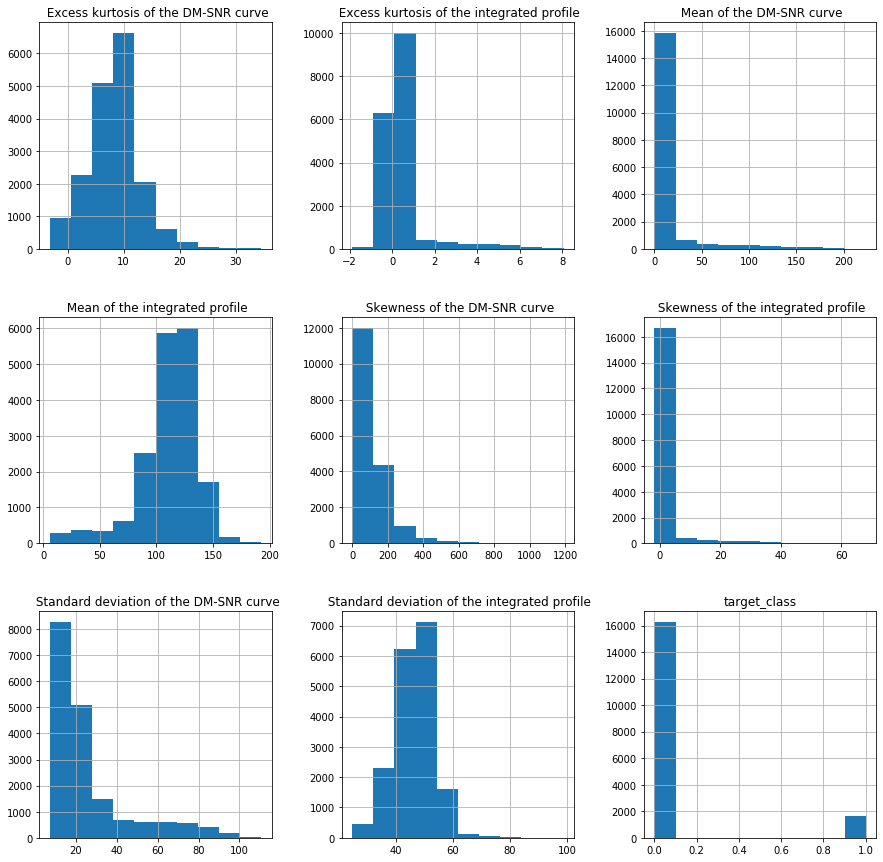

In [176]:
df.hist(figsize=(15,15))
plt.show()

## BOX PLOT
Penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

 Mean of the integrated profile                     AxesSubplot(0.125,0.821923;0.352273x0.0580769)
 Standard deviation of the integrated profile    AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
 Excess kurtosis of the integrated profile          AxesSubplot(0.125,0.752231;0.352273x0.0580769)
 Skewness of the integrated profile              AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
 Mean of the DM-SNR curve                           AxesSubplot(0.125,0.682538;0.352273x0.0580769)
 Standard deviation of the DM-SNR curve          AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
 Excess kurtosis of the DM-SNR curve                AxesSubplot(0.125,0.612846;0.352273x0.0580769)
 Skewness of the DM-SNR curve                    AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
target_class                                        AxesSubplot(0.125,0.543154;0.352273x0.0580769)
dtype: object

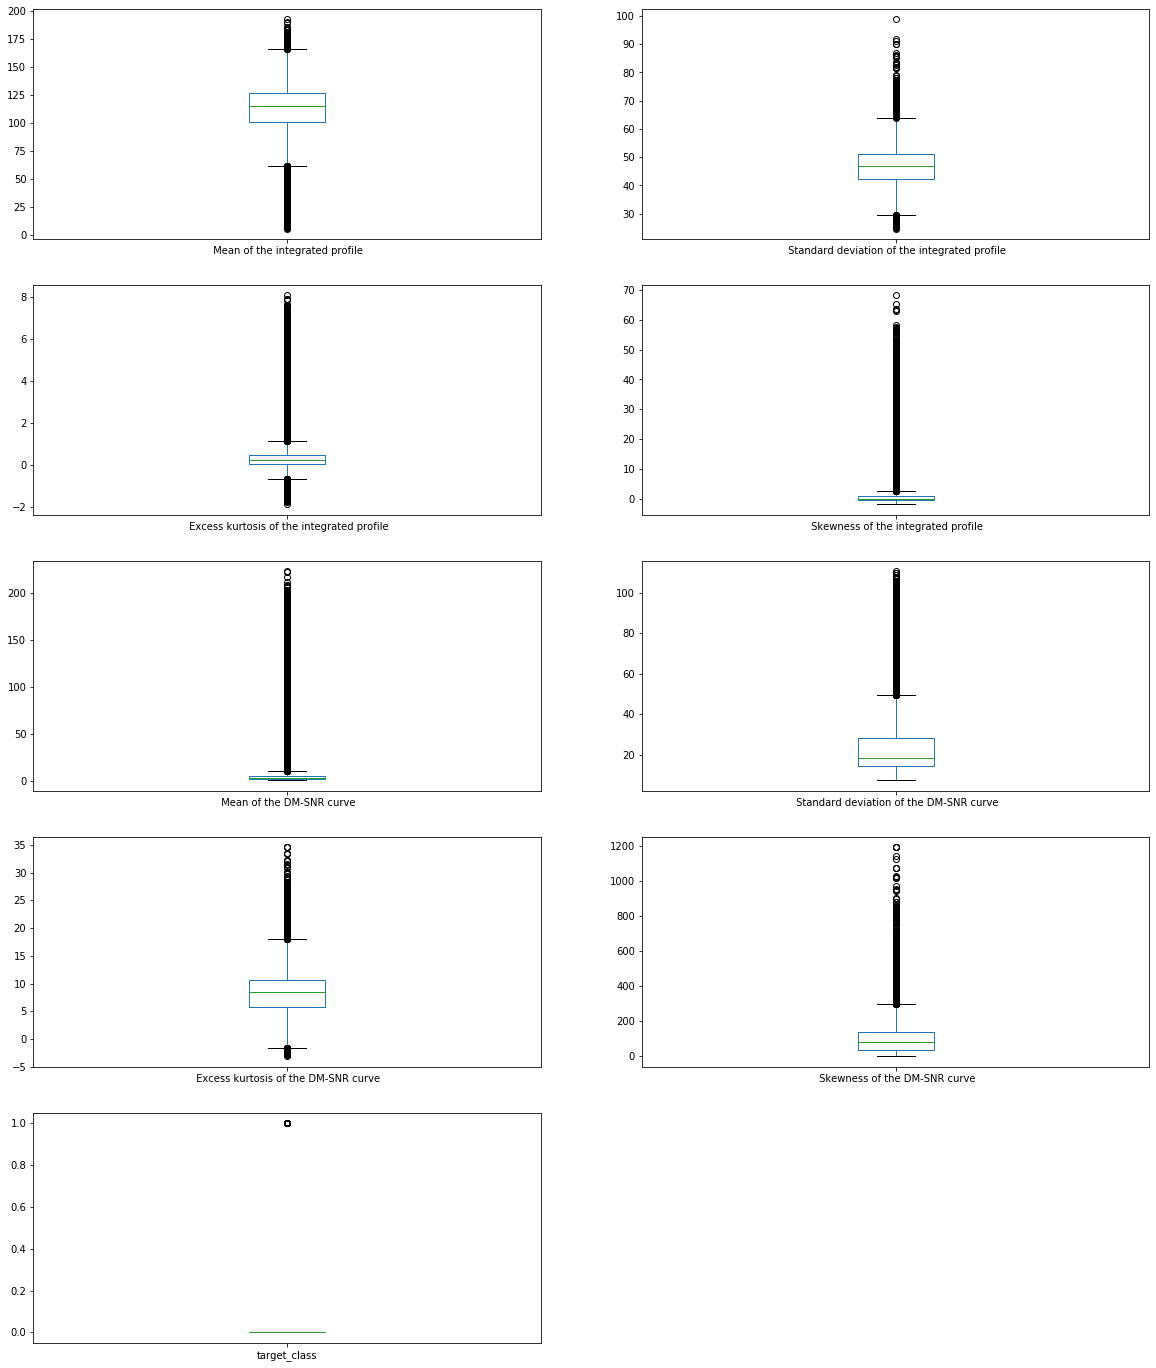

In [178]:
df.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(20,55))

## Preprosessing Data 

Disini data dipersiapkan dulu , bisa discaling atau diperbaiki nilai yang kosong.

## Mengecek apakah didalam data ada nilai yang kosong.



In [117]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [118]:
df.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## Split kolom menjadi fitur dan class

In [129]:
x = df.iloc[:,0:8].values
y = df.iloc[:,8].values

## Scaling data Fitur

In [130]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

## ONE HOT ENCODING

In [131]:
y_scaled = to_categorical(y)

In [132]:
y_scaled.shape

(17898, 2)

In [141]:
y_scaled

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## SPLITTING DATA 

DATA DIBAGI MENJADI 2 YAITU DATA TRAIN DAN DATA TEST DENGAN PERBANDINGAN 9 BANDING 1.

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.1, random_state=2)

## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [142]:
model = Sequential()
model.add(Dense(units= 100, input_dim= 8, activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 2, activation='sigmoid'))

Dalam hal ini, terdapat input layer, hidden layer, dan output layer. Dimana ada yang menggunakan Rectified Linear Unit atau yang dikenal sebagai ReLU, adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf. Fungsi ini hanya max (0, x), dan Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum.

In [180]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 202       
Total params: 11,202
Trainable params: 11,202
Non-trainable params: 0
_________________________________________________________________


summary() berfungsi untuk menampilkan ringkasan parameter berdasarkan layer dan output shape.

In [143]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek AST). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

## training data

In [144]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100)

Train on 16108 samples, validate on 1790 samples
Epoch 1/100
16108/16108 [==============================] - 3s 169us/step - loss: 0.1265 - acc: 0.9648 - val_loss: 0.0796 - val_acc: 0.9785
Epoch 2/100
16108/16108 [==============================] - 1s 58us/step - loss: 0.0838 - acc: 0.9752 - val_loss: 0.0782 - val_acc: 0.9771
Epoch 3/100
16108/16108 [==============================] - 1s 58us/step - loss: 0.0827 - acc: 0.9753 - val_loss: 0.0762 - val_acc: 0.9788
Epoch 4/100
16108/16108 [==============================] - 1s 64us/step - loss: 0.0807 - acc: 0.9762 - val_loss: 0.0777 - val_acc: 0.9793
Epoch 5/100
16108/16108 [==============================] - 1s 57us/step - loss: 0.0794 - acc: 0.9765 - val_loss: 0.0770 - val_acc: 0.9796
Epoch 6/100
16108/16108 [==============================] - 1s 60us/step - loss: 0.0785 - acc: 0.9770 - val_loss: 0.0728 - val_acc: 0.9779
Epoch 7/100
16108/16108 [==============================] - 1s 62us/step - loss: 0.0780 - acc: 0.9764 - val_loss: 0.0724 - 

16108/16108 [==============================] - 1s 62us/step - loss: 0.0657 - acc: 0.9808 - val_loss: 0.0684 - val_acc: 0.9802
Epoch 60/100
16108/16108 [==============================] - 1s 59us/step - loss: 0.0665 - acc: 0.9801 - val_loss: 0.0666 - val_acc: 0.9799
Epoch 61/100
16108/16108 [==============================] - 1s 58us/step - loss: 0.0658 - acc: 0.9804 - val_loss: 0.0689 - val_acc: 0.9777
Epoch 62/100
16108/16108 [==============================] - 1s 55us/step - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0678 - val_acc: 0.9777
Epoch 63/100
16108/16108 [==============================] - 1s 56us/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0674 - val_acc: 0.9799
Epoch 64/100
16108/16108 [==============================] - 1s 63us/step - loss: 0.0655 - acc: 0.9799 - val_loss: 0.0666 - val_acc: 0.9810
Epoch 65/100
16108/16108 [==============================] - ETA: 0s - loss: 0.0645 - acc: 0.981 - 1s 60us/step - loss: 0.0650 - acc: 0.9807 - val_loss: 0.0672 - val_acc: 0.9782
Ep

## ACCURACY 
Berikut ini akan ditampilkan nilai akurasi dan dalam hal ini akurasinya mencapai 97.93%

In [145]:
acc_testing  = model.evaluate(x_test, y_test) 
print('\nAccuracy is', acc_testing[1]*100)

1790/1790 [==============================] - 0s 18us/step

Accuracy is 97.93296089385476


## plot perbandingan akurasi training dan testing

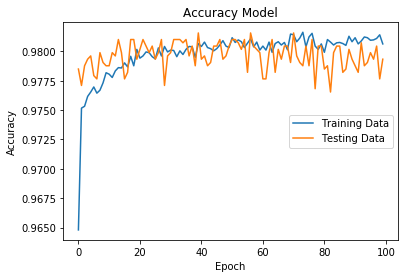

In [151]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='center right')
plt.show()

## plot perbandingan loss training dan testing

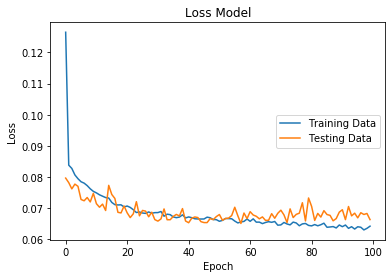

In [153]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='center right')
plt.show()

In [148]:
prediction = model.predict_classes(x_test)
y_real = np.argmax(y_test,axis=1)

In [156]:
prediction[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [157]:
y_real[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Confusion Matrix
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

Konsep dari confusion matrix adalah sebagai berikut : <br>
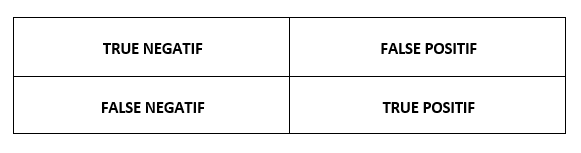

Berdasarkan hasil tersebut, didapat confusion matrix sebagai berikut : <br>
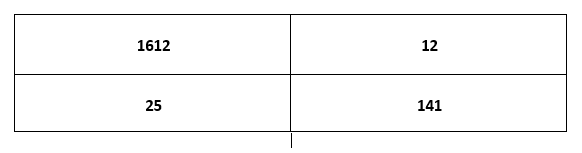

In [158]:
cm = confusion_matrix(y_real, prediction)
print(cm)

[[1612   12]
 [  25  141]]


## Rumus Accuracy, Recall, dan Precision

In [183]:
akurasi = accuracy_score(y_real,prediction)
print(akurasi*100)

97.93296089385476


In [184]:
accuracy = ((1612+141) / (1612+25+12+141))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))


Accuracy: 97.93%


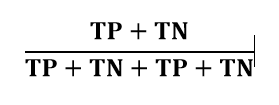

In [165]:
recall = recall_score(y_real,prediction)
print(recall*100)

84.93975903614458


In [185]:
recall = ((141) / (25+141))
print("\n%s: %.2f%%" % ("Recall", recall*100))


Recall: 84.94%


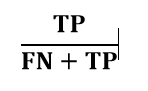

In [164]:
presisi = precision_score(y_real,prediction)
print(presisi*100)

92.15686274509804


In [186]:
precission =((141) / (12+141))
print("\n%s: %.2f%%" % ("precission", precission*100))


precission: 92.16%


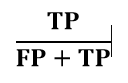

In [163]:
f1 = f1_score(y_real,prediction)
print(f1*100)

88.40125391849529


In [167]:
from sklearn.metrics import classification_report

In [168]:
print(classification_report(y_real,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1624
           1       0.92      0.85      0.88       166

    accuracy                           0.98      1790
   macro avg       0.95      0.92      0.94      1790
weighted avg       0.98      0.98      0.98      1790



## Referensi

Datasheet = https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star